# Sentiment_Analysis_of _Product_Reviews

# Project : Samsung Galaxy S24 Ultra 5G Review Analysis
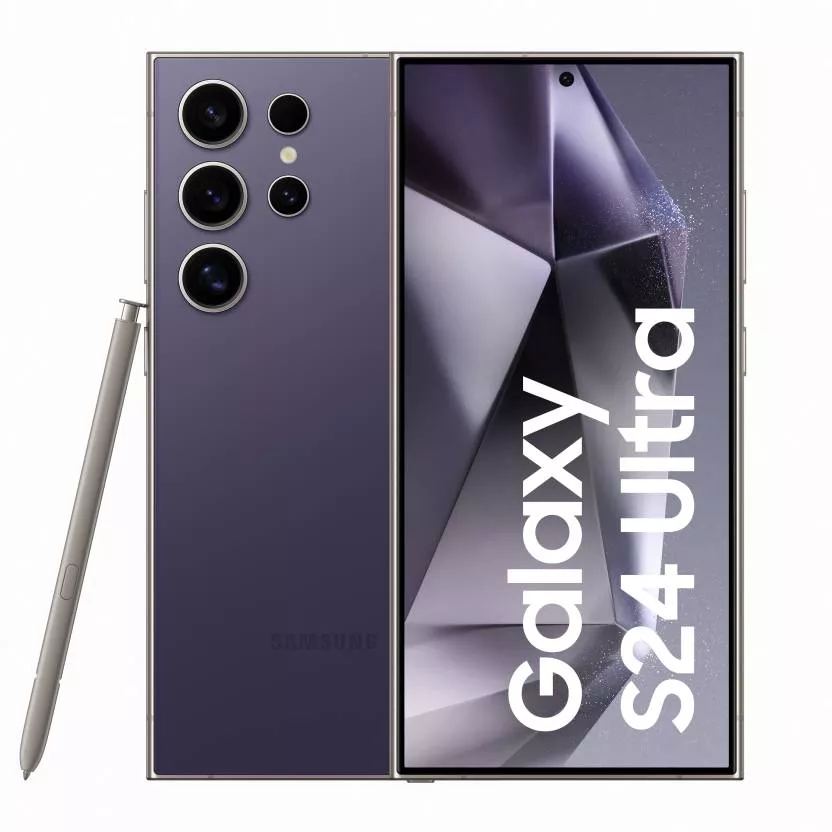

## Product: 
    Samsung Galaxy S24 Ultra 5G (Titanium Violet, 256 GB) with 12 GB RAM

## Objective: 
    To analyze customer reviews of the Samsung Galaxy S24 Ultra 5G from Flipkart, focusing on sentiment analysis, word frequency, and topic modeling to gain insights into customer opinions and product attributes.

## Steps Taken:

### Data Collection:

    Utilized Selenium for web scraping to gather reviews from the Flipkart product page and saved the data into a CSV file.

### Data Cleaning:

    Checked the data for null values and duplicates.
    Applied common text preprocessing techniques:
        Stopword removal
        Removal of links and punctuations
        Lowercasing
        Lemmatization
### Text Analysis:

#### Word Frequency Analysis:
    Generated a word cloud to visualize the most frequently occurring words in the reviews.
    
#### Review Length Analysis:
    Analyzed the distribution of review lengths.
    
#### Distribution of Product Ratings:
    Plotted the distribution of ratings to visualize the frequency of each star rating.
    
#### Sentiment Analysis:
    Used TextBlob to analyze the sentiment of reviews.
    Findings:
    * 85.98% of reviews are rated 5 stars.
    * 12.15% of reviews are rated 4 stars.
    * 1.87% of reviews are rated 3 stars.
    * 89.72% of reviews show positive sentiment.
    * 6.54% of reviews are neutral.
    * 3.74% of reviews show negative sentiment.
    * The sentiment analysis is consistent with the manual ratings given.

#### Topic Modeling:

    Applied Latent Dirichlet Allocation (LDA) to identify prevalent topics in the reviews.
###### Topics Identified:

    Topic 1: Focuses on general positive aspects of the product, with words like "great," "superb," "excellent," and "good" indicating overall satisfaction and high performance.
    
    Topic 2: Highlights specific features and attributes of the phone, with words like "battery," "display," "camera," and "awesome" indicating praise for particular features.


## Results:
    Ratings: Majority of the reviews are positive, with a high percentage of 5-star ratings.
    
    Frequent Words: Common terms include "phone," "camera," "best," and "good."
    
    Review Length: Most comments are concise, with a word count of less than 10 words, and three-word reviews being most common.
    
    Sentiment: The sentiment analysis shows that the majority of reviews are positive, aligning well with the high rating distribution.
    
    Topics: Two main topics were identified, reflecting general satisfaction and specific features.

This analysis provides valuable insights into the actual customer perceptions and highlights key areas of satisfaction and feature appreciation for the Samsung Galaxy S24 Ultra 5G.

In [1]:
# import necessary libraries

# general libraries
import pandas as pd
import numpy as np
from collections import Counter
import csv
import os
import pickle
import re

import warnings
warnings.filterwarnings('ignore')

# web scraping libraries
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import requests
from selenium.common.exceptions import NoSuchElementException,TimeoutException
from selenium.webdriver.chrome.options import Options
from datetime import datetime, timedelta

# nlp and other preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [19]:
# open chrome and load the webpage
driver=webdriver.Chrome()
url='https://www.flipkart.com/samsung-galaxy-s24-ultra-5g-titanium-violet-256-gb/p/itmd4f51262e3e6b?pid=MOBGX2F38JBJGZSE&lid=LSTMOBGX2F38JBJGZSELMVCH5&marketplace=FLIPKART&q=+Samsung+Galaxy+S24+Ultra&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=Search&iid=4e97e096-0ae0-46cf-bfab-3ea26634162e.MOBGX2F38JBJGZSE.SEARCH&ppt=sp&ppn=sp&ssid=ce97fv89zk0000001722094270628&qH=d8534a0b5ef73b1f'
driver.get(url)

In [11]:
# Function to scrape ratings
def scrape_ratings(driver, max_ratings=120):
    rating = []
    start_time = time.time()

    # Click on the element to display ratings
    driver.find_element(By.XPATH, '//div[@class="col pPAw9M"]/a[1]').click()
    time.sleep(5)

    while len(rating) < max_ratings:
        # Scrape ratings from current page
        for i in driver.find_elements(By.XPATH, '//div[@class="XQDdHH Ga3i8K"]'):
            if len(rating) < max_ratings:
                rating.append(i.text)
            if len(rating) >= max_ratings:
                break

        if len(rating) >= max_ratings:
            break

        # Click on the "next" button if available
        next_buttons = driver.find_elements(By.XPATH, '//a[@class="_9QVEpD"]')
        if next_buttons:
            next_buttons[-1].click()
        else:
            break  # Break if no "next" button found

        time.sleep(3)  # Adjust sleep time if needed

    time_taken = time.time() - start_time
    print(f'Time Taken for scraping ratings: {time_taken:.2f} seconds')
    
    return rating

# Call the function and store the result
ratings = scrape_ratings(driver)

Time Taken for scraping ratings: 72.17 seconds


In [20]:
# Function to scrape reviews
def scrape_reviews(driver, max_reviews=120):
    review = []
    start_time = time.time()

    # Click on the element to display ratings
    driver.find_element(By.XPATH, '//div[@class="col pPAw9M"]/a[1]').click()
    time.sleep(5)

    while len(review) < max_reviews:
        # Scrape ratings from current page
        for i in driver.find_elements(By.XPATH, '//div[@class="ZmyHeo"]/div/div'):
            if len(review) < max_reviews:
                review.append(i.text)
            if len(review) >= max_reviews:
                break

        if len(review) >= max_reviews:
            break

        # Click on the "next" button if available
        next_buttons = driver.find_elements(By.XPATH, '//a[@class="_9QVEpD"]')
        if next_buttons:
            next_buttons[-1].click()
        else:
            break  # Break if no "next" button found

        time.sleep(3)  # Adjust sleep time if needed

    time_taken = time.time() - start_time
    print(f'Time Taken for scraping ratings: {time_taken:.2f} seconds')
    
    return review

# Call the function and store the result
reviews = scrape_reviews(driver)

Time Taken for scraping ratings: 62.20 seconds


In [ ]:
driver.quit()

In [24]:
if len(ratings)==len(reviews):
    
    flipkart_reviews=pd.DataFrame({'rating': ratings,'review':reviews})
    print(flipkart_reviews)
    
else:
    print('Dataframe cannot be created as lengths of ratings and reviews dont match.\nLength of rating ')

    rating                                             review
0        5                          Best in night photography
1        5  Best mobile for photography\nCharging wise als...
2        5  Android King 🤴\nAll-rounder phone 📱\nAll in on...
3        5                                          Excellent
4        5                               Amazing Products 👏 🤩
..     ...                                                ...
115      5                Loved it\n\nMigrated from oneplus 8
116      5  The camera was very nice especially the zoomin...
117      5                                  World best Fone..
118      5                                      Awesome phone
119      5  Best mobile I have ever used. So elegant, styl...

[120 rows x 2 columns]


In [40]:
#save as CSV file
df = pd.DataFrame(flipkart_reviews)
df.to_csv('flipkart_reviews.csv', index=False)


In [70]:
#load saved df

df=pd.read_csv('flipkart_reviews.csv')
df.head(10)

,rating,review
0,5,Best in night photography
1,5,Best mobile for photography\nCharging wise als...
2,5,Android King 🤴\nAll-rounder phone 📱\nAll in on...
3,5,Excellent
4,5,Amazing Products 👏 🤩
5,5,Awesome Display and Camera.\nBattery performan...
6,5,Superb product great in every aspect. Go for it
7,5,"Awesome product. Best display, best camera, be..."
8,5,World's best phone👌
9,5,Great design. Easy to use. Very nice performan...


In [71]:
df.shape

(120, 2)

In [72]:
df.dtypes

rating     int64
review    object
dtype: object

In [73]:
# check for nulls in the df

print(df.isna().sum())

rating    0
review    0
dtype: int64


In [74]:
# check for duplicates

print('Number of duplicates : ',df.duplicated().sum())

Number of duplicates :  13


In [75]:
# remove duplicates
df.drop_duplicates(inplace=True)
dups=df.duplicated().sum()
print('Number of duplicates after cleaning: ',dups)

Number of duplicates after cleaning:  0


In [76]:
# check the value count of rating column

df['rating'].value_counts()

rating
5    92
4    13
3     2
Name: count, dtype: int64

Observation:

    The product has majority high ratings

In [78]:
# create a copy of df before making changes
df1=df.copy()

In [80]:
# clean reviews
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_reviews(review):
    reviews =re.sub(r'[^a-zA-Z\s]', '', reviews)
    reviews = re.sub(r'http\S+|www\S+|https\S+', '', reviews, flags=re.MULTILINE)
    reviews =reviews.lower().split()
    reviews =[lemmatizer.lemmatize(word) for word in reviews if word not in stop_words]
    return ' '.join(reviews)

df1['cleaned_reviews'] = df1['review'].apply(clean_reviews)

display(df1.head())

,rating,review,cleaned_reviews
0,5,Best in night photography,best night photography
1,5,Best mobile for photography\nCharging wise als...,best mobile photography charging wise also goo...
2,5,Android King 🤴\nAll-rounder phone 📱\nAll in on...,android king allrounder phone one
3,5,Excellent,excellent
4,5,Amazing Products 👏 🤩,amazing product


In [81]:
df1.drop('review',axis=1,inplace=True)

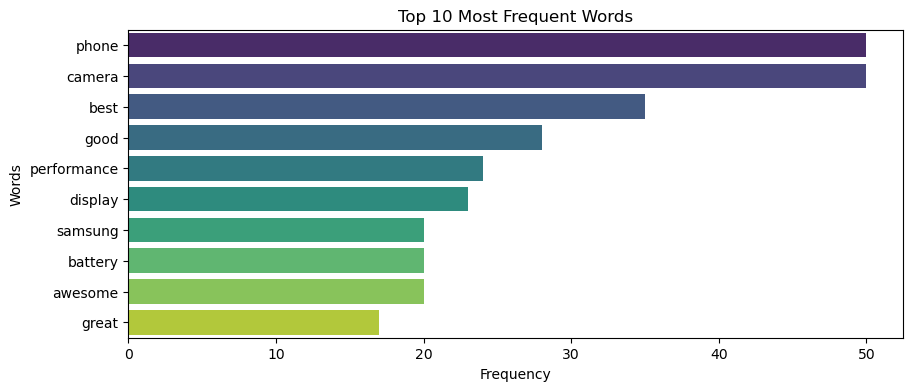

In [82]:
# Word Frequency Analysis
all_words = ' '.join(df1['cleaned_reviews']).split()
word_freq = Counter(all_words)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
top20=word_freq_df.head(10)

# plot the top 10 words
plt.figure(figsize=(10, 4))
sns.barplot(x='frequency', y='word', data=top20, palette='viridis')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

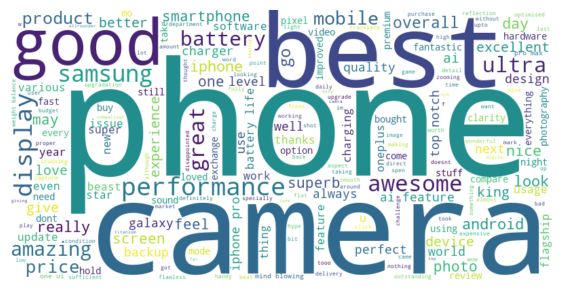

In [83]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Observation:

    Most frequently occuring words are phone, camera, best, good and so on.

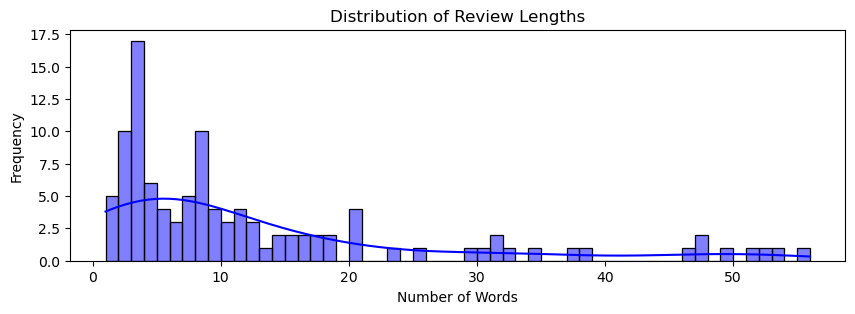

In [84]:
# distribution of review_length

df1['review_length'] = df1['cleaned_reviews'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 3))
sns.histplot(df1['review_length'], bins=55, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [85]:
df1['review_length'].value_counts()

review_length
3     17
2     10
8     10
4      6
1      5
7      5
11     4
20     4
5      4
9      4
10     3
12     3
6      3
15     2
17     2
18     2
47     2
14     2
16     2
31     2
25     1
53     1
29     1
49     1
34     1
32     1
46     1
13     1
52     1
51     1
30     1
23     1
56     1
38     1
37     1
Name: count, dtype: int64

Observation:

    Most comments have a word count of less than 10 approximately
    Three-word reviews are most common

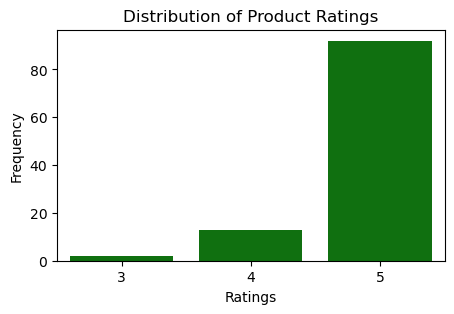

In [101]:
# rating analysis

rating_counts = df1['rating'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='green')

plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.show()


In [103]:
# Calculate percentage of each rating
sentiment_ratings = (df1['rating'].value_counts(normalize=True) * 100).round(2)

sentiment_ratings

rating
5    85.98
4    12.15
3     1.87
Name: proportion, dtype: float64

Observation:

    Majority reviews have 5 star ratings.
    85.98% reviews have 5 star rating followed by a very low percentage of 4 star (12.15%) and 3 star (1.87%)  reviews

In [88]:
# sentiment analysis using TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df1['sentiment'] = df1['cleaned_reviews'].apply(analyze_sentiment)
df1.head()

,rating,cleaned_reviews,review_length,sentiment
0,5,best night photography,3,Positive
1,5,best mobile photography charging wise also goo...,13,Positive
2,5,android king allrounder phone one,5,Neutral
3,5,excellent,1,Positive
4,5,amazing product,2,Positive


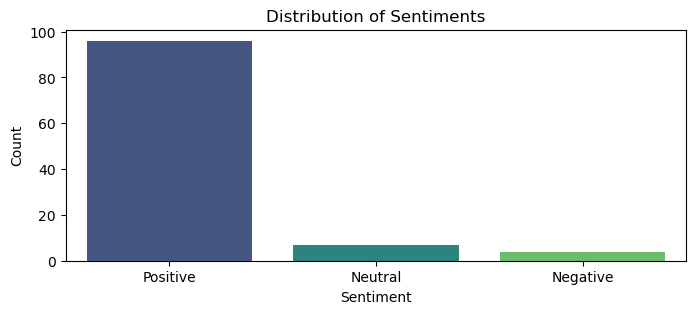

In [89]:
# plot sentiment distribution 

plt.figure(figsize=(8, 3))
sns.countplot(x='sentiment', data=df1, palette='viridis')

plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [90]:
# Calculate percentage of each sentiment class
sentiment_percentages = (df1['sentiment'].value_counts(normalize=True) * 100).round(2)

sentiment_percentages

sentiment
Positive    89.72
Neutral      6.54
Negative     3.74
Name: proportion, dtype: float64

Observation:

    89.72% reviews are showing positive sentiment followed by a very low percentage of neutral (6.54%) and negative (3.74%)  reviews

In [91]:
# topic modeling

# convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review']) 

# perform Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=2, random_state=42)  # 2 topics
lda.fit(X)  # Fit the LDA model to the TF-IDF features


for index, topic in enumerate(lda.components_):
    print(f'Topic #{index}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #0:
['overall', 'price', 'great', 'android', 'king', 'superb', 'product', 'performance', 'excellent', 'good']
Topic #1:
['good', 'battery', 'great', 'world', 'display', 'samsung', 'awesome', 'camera', 'phone', 'best']


Observations:

    Two prevalent topics with 10 key words in the reviews were identified
    
    First topic seems to focus on general positive aspects of the product, like "great," "superb," "excellent," and "good" suggest that reviews in this topic highlight overall satisfaction and high performance.
    
    Second topic seems to focus on specific features and attributes of the phone, like "battery," "display," "camera," and "awesome" suggest that reviews in this topic praise particular features of the phone.